In [1]:
pip install sqlite3

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3


In [2]:
import sqlite3

In [3]:
import pandas as pd

In [4]:
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

In [5]:
cursor.execute('''
CREATE TABLE ae_data (
    id INTEGER PRIMARY KEY,
    month TEXT,
    total_attendances INTEGER,
    admissions INTEGER,
    seen_within_4hrs REAL
);
''')

In [6]:
data = [
    (1, 'January', 15000, 4000, 87.5),
    (2, 'February', 14500, 3800, 88.3),
    (3, 'March', 16000, 4200, 86.9),
    (4, 'April', 15500, 4100, 89.1),
    (5, 'May', 16200, 4300, 85.7)
]

cursor.executemany('''
INSERT INTO ae_data VALUES (?, ?, ?, ?, ?)
''', data)

conn.commit()

In [7]:
df = pd.read_sql_query("SELECT * FROM ae_data", conn)
print(df)

   id     month  total_attendances  admissions  seen_within_4hrs
0   1   January              15000        4000              87.5
1   2  February              14500        3800              88.3
2   3     March              16000        4200              86.9
3   4     April              15500        4100              89.1
4   5       May              16200        4300              85.7


In [8]:
df_total = pd.read_sql_query("""
SELECT SUM(total_attendances) AS total_attendances_all_months
FROM ae_data
""", conn)
print(df_total)

   total_attendances_all_months
0                         77200


In [9]:
df_rate = pd.read_sql_query("""
SELECT 
    month,
    ROUND((admissions * 100.0 / total_attendances), 2) AS admission_rate
FROM ae_data
""", conn)
print(df_rate)

      month  admission_rate
0   January           26.67
1  February           26.21
2     March           26.25
3     April           26.45
4       May           26.54


In [10]:
df_perf = pd.read_sql_query("""
SELECT AVG(seen_within_4hrs) AS avg_performance
FROM ae_data
""", conn)
print(df_perf)

   avg_performance
0             87.5


In [12]:
import matplotlib.pyplot as plt

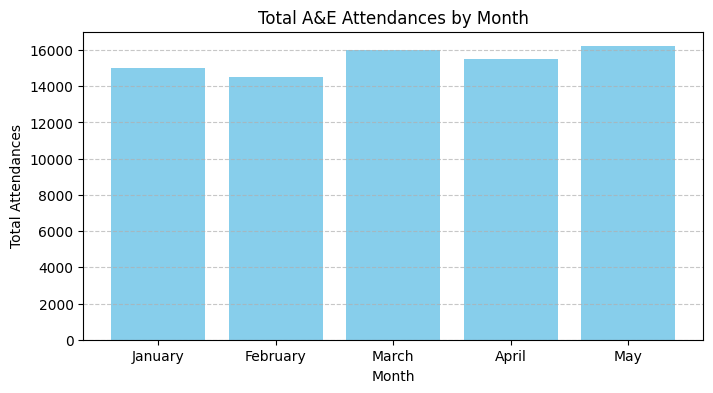

In [13]:
df = pd.read_sql_query("SELECT * FROM ae_data", conn)

# ----------------------------
# Plot total attendances (bar chart)
# ----------------------------
plt.figure(figsize=(8, 4))
plt.bar(df['month'], df['total_attendances'], color='skyblue')
plt.title("Total A&E Attendances by Month")
plt.xlabel("Month")
plt.ylabel("Total Attendances")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


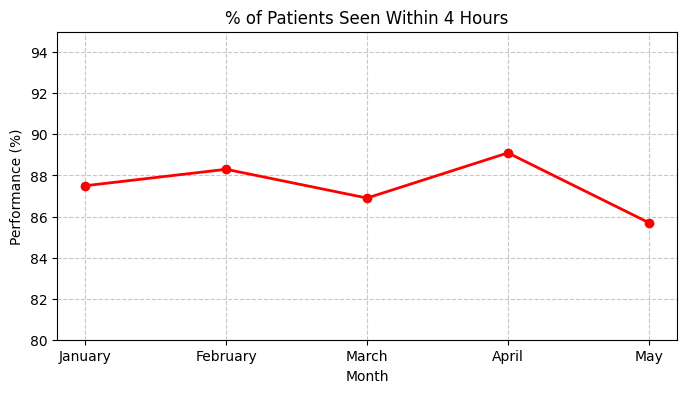

In [14]:
# ----------------------------
#  Plot % seen within 4 hours (line chart)
# ----------------------------
plt.figure(figsize=(8, 4))
plt.plot(df['month'], df['seen_within_4hrs'], marker='o', color='red', linewidth=2)
plt.title("% of Patients Seen Within 4 Hours")
plt.xlabel("Month")
plt.ylabel("Performance (%)")
plt.ylim(80, 95)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

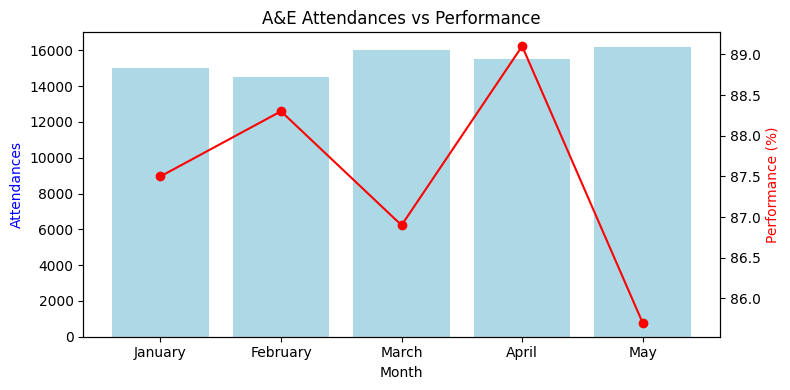

In [15]:
# ----------------------------
# Bar + Line combo (Attendances vs Performance)
# ----------------------------
fig, ax1 = plt.subplots(figsize=(8, 4))

ax1.bar(df['month'], df['total_attendances'], color='lightblue', label='Attendances')
ax1.set_xlabel('Month')
ax1.set_ylabel('Attendances', color='blue')

ax2 = ax1.twinx()
ax2.plot(df['month'], df['seen_within_4hrs'], color='red', marker='o', label='% Seen Within 4 Hours')
ax2.set_ylabel('Performance (%)', color='red')

plt.title("A&E Attendances vs Performance")
fig.tight_layout()
plt.show()

In [17]:
import numpy as np

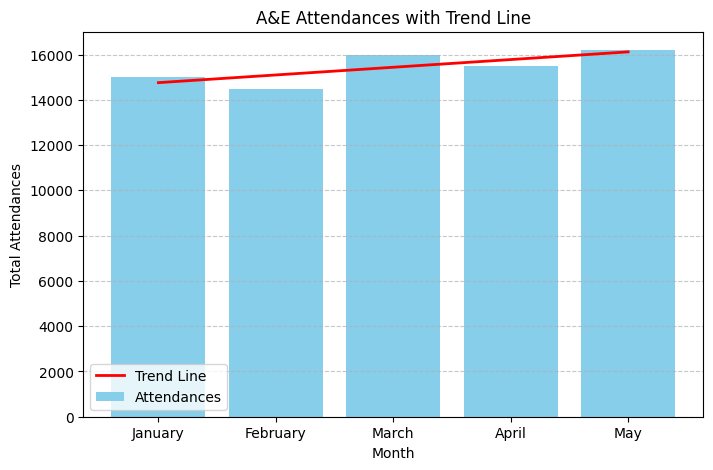

In [18]:
#Trend analysis
#  Load data into pandas
# ----------------------------
df = pd.read_sql_query("SELECT * FROM ae_data", conn)

# ----------------------------
#  Add Linear Regression Trend Line
# ----------------------------
x = np.arange(len(df))  # numerical version of months (0,1,2,3,4)
y = df['total_attendances']

# Fit linear regression line
coefficients = np.polyfit(x, y, 1)
trend = np.poly1d(coefficients)

# ----------------------------
#  Plot Attendances + Trend
# ----------------------------
plt.figure(figsize=(8, 5))
plt.bar(df['month'], df['total_attendances'], color='skyblue', label='Attendances')
plt.plot(df['month'], trend(x), color='red', linewidth=2, label='Trend Line')

plt.title("A&E Attendances with Trend Line")
plt.xlabel("Month")
plt.ylabel("Total Attendances")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

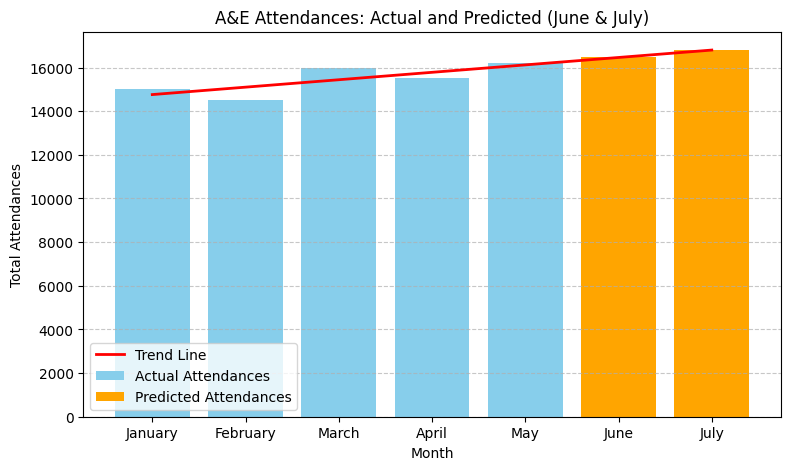

In [19]:
#Predicting next 2 months
df = pd.read_sql_query("SELECT * FROM ae_data", conn)

# ----------------------------
#  Linear Regression Model
# ----------------------------
x = np.arange(len(df))  # numerical months (0,1,2,3,4)
y = df['total_attendances']

# Fit line (y = mx + c)
coefficients = np.polyfit(x, y, 1)
trend = np.poly1d(coefficients)

# Predict next 2 months
future_x = np.arange(len(df), len(df) + 2)
future_months = ['June', 'July']
future_predictions = trend(future_x)

# Create DataFrame for predicted months
df_future = pd.DataFrame({
    'month': future_months,
    'total_attendances': future_predictions,
    'predicted': True
})

# Add a column to original data
df['predicted'] = False

# Combine both
df_all = pd.concat([df, df_future], ignore_index=True)

# ----------------------------
# Plot Historical + Predicted
# ----------------------------
plt.figure(figsize=(9, 5))
plt.bar(df_all.loc[~df_all['predicted'], 'month'], 
        df_all.loc[~df_all['predicted'], 'total_attendances'],
        color='skyblue', label='Actual Attendances')

plt.bar(df_all.loc[df_all['predicted'], 'month'], 
        df_all.loc[df_all['predicted'], 'total_attendances'],
        color='orange', label='Predicted Attendances')

plt.plot(df_all['month'], trend(np.arange(len(df_all))), color='red', linewidth=2, label='Trend Line')

plt.title("A&E Attendances: Actual and Predicted (June & July)")
plt.xlabel("Month")
plt.ylabel("Total Attendances")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression

📈 Predicted A&E Attendances:
  month  predicted_attendances
0  June                16460.0
1  July                16800.0


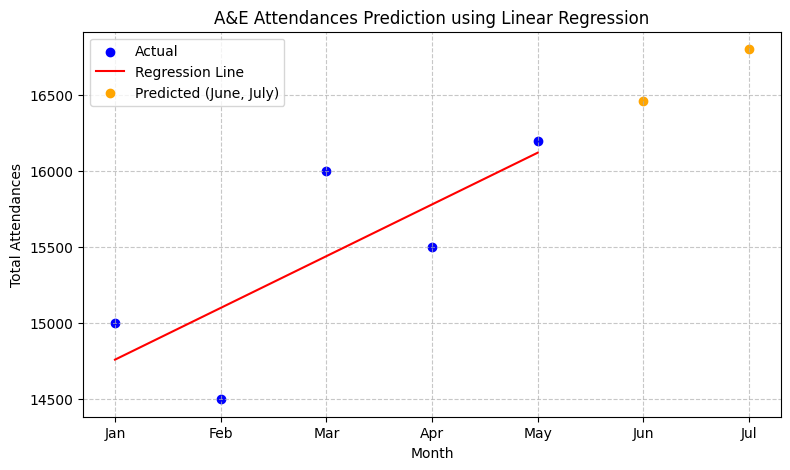

In [21]:
# ----------------------------
#Prediction using ML model(Linear regression from scikit)
df = pd.read_sql_query("SELECT * FROM ae_data", conn)

# ----------------------------
#  Prepare Data for ML Model
# ----------------------------
# Use month number as feature (1 for Jan, 2 for Feb, etc.)
X = np.array(df['id']).reshape(-1, 1)          # feature (month index)
y = np.array(df['total_attendances']).reshape(-1, 1)  # target variable

# Train the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# ----------------------------
#  Predict for future months (June, July)
# ----------------------------
future_months = np.array([[6], [7]])   # June, July
predictions = model.predict(future_months)

# Combine into one dataframe
future_df = pd.DataFrame({
    'month': ['June', 'July'],
    'predicted_attendances': predictions.flatten()
})

print("📈 Predicted A&E Attendances:")
print(future_df)

# ----------------------------
#  Visualize Actual vs Predicted
# ----------------------------
plt.figure(figsize=(9, 5))

# Actual data
plt.scatter(df['id'], df['total_attendances'], color='blue', label='Actual')
plt.plot(df['id'], model.predict(X), color='red', label='Regression Line')

# Predictions
plt.scatter(future_months, predictions, color='orange', label='Predicted (June, July)')

# Labels
plt.xticks([1,2,3,4,5,6,7], ['Jan','Feb','Mar','Apr','May','Jun','Jul'])
plt.title("A&E Attendances Prediction using Linear Regression")
plt.xlabel("Month")
plt.ylabel("Total Attendances")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()